In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install kmeans
%pip install -U scikit-learn scipy matplotlib
%pip install openpyxl
%pip install flask-ngrok
%pip install flask


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\asus\appdata\local\programs\python\python311\lib\site-packages (3.8.2)




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for kmeans
Failed to build kmeans
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [19 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\kmeans
      copying kmeans\performance.py -> build\lib.win-amd64-cpython-311\kmeans
      copying kmeans\tests.py -> build\lib.win-amd64-cpython-311\kmeans
      copying kmeans\__init__.py -> build\lib.win-amd64-cpython-311\kmeans
      running egg_info
      writing kmeans.egg-info\PKG-INFO
      writing dependency_links to kmeans.egg-info\dependency_links.txt
      writing top-level names to kmeans.egg-info\top_level.txt
      reading manifest file 'kmeans.egg-info\SOURCES.txt'
      writing manifest file 'kmeans.egg-info\SOURCES.txt'
      copying kmeans\lib.c -> build\lib.win-amd64-cpython-311\kmeans
      running build_ext
      building 'kmeans/lib' extensio

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\asus\appdata\local\programs\python\python311\lib\site-packages (1.3.2)




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import flask
from sklearn.cluster import KMeans
from flask import Flask, request, jsonify

In [3]:
# import data
df = pd.read_excel('Data Bencana.xlsx')
df.head()

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3507 105 2023 011 030 1,3507,2023-11-30,PUTING BELIUNG,Kec. Jabung Ds. Sukolilo Kec. Tumpang Ds. Du...,MALANG,JAWA TIMUR,Dokumentasi,●hujan deras disertai angin mengakibatkan bebe...,NaN,NaN,NaN,0,NaN,2
1,2,5106 102 2023 011 030 1,5106,2023-11-30,TANAH LONGSOR,Kec. Tembuku Ds. Jehem,BANGLI,BALI,Dokumentasi,●akibat turunnya hujan diwilayah Kabupaten Ban...,2.0,NaN,NaN,1,NaN,3
2,3,3209 106 2023 011 030 1,3209,2023-11-30,KEKERINGAN,Kec. Palimanan Ds. Cilukrak Kec. Sumber Kel....,CIREBON,JAWA BARAT,Dokumentasi,"●Disebabkan oleh faktor cuaca musim kemarau, s...",0.0,NaN,NaN,0,NaN,1
3,4,3210 101 2023 011 030 1,3210,2023-11-30,BANJIR,Kec. Kadipaten Ds. Kadipaten,MAJALENGKA,JAWA BARAT,Dokumentasi,●Pada hari Kamis tanggal 30 November 2023 Seki...,NaN,NaN,NaN,0,6.0,5
4,5,1802 101 2023 011 030 1,1802,2023-11-30,BANJIR,Kec. Pematang Sawa Ds. Tanjungan Ds. Betung K...,TANGGAMUS,LAMPUNG,Dokumentasi,●akibat jebolnya tanggul sungai sehingga air m...,NaN,NaN,NaN,14,109.0,2


In [4]:
# cek ukuran data
df.shape

(74, 16)

In [5]:
# lihat deskripsi data
df.describe

<bound method NDFrame.describe of     No.   Kode Identitas Bencana  ID Kabupaten Tanggal Kejadian  \
0     1  3507 105 2023 011 030 1          3507       2023-11-30   
1     2  5106 102 2023 011 030 1          5106       2023-11-30   
2     3  3209 106 2023 011 030 1          3209       2023-11-30   
3     4  3210 101 2023 011 030 1          3210       2023-11-30   
4     5  1802 101 2023 011 030 1          1802       2023-11-30   
..  ...                      ...           ...              ...   
69   70  1274 101 2023 011 021 1          1274       2023-11-21   
70   71  3201 105 2023 011 021 1          3201       2023-11-21   
71   72  1215 102 2023 011 021 1          1215       2023-11-21   
72   73  5201 105 2023 011 021 1          5201       2023-11-21   
73   74  3271 102 2023 011 021 1          3271       2023-11-21   

          Kejadian                                             Lokasi  \
0   PUTING BELIUNG  Kec.  Jabung  Ds. Sukolilo Kec. Tumpang Ds. Du...   
1    TANAH LONG

In [6]:
# cek data null
df.isnull().sum()

No.                         0
Kode Identitas Bencana      0
ID Kabupaten                0
Tanggal Kejadian            0
Kejadian                    0
Lokasi                      0
Kabupaten                   0
Provinsi                    0
Kronologi & Dokumentasi     0
Penyebab                    1
Meninggal                  70
Hilang                     74
Terluka                    68
Rumah Rusak                 0
Rumah Terendam             44
Fasum Rusak                 0
dtype: int64

In [7]:
# hapus data null
df.fillna(0, inplace=True)

In [8]:
# cek kembali data null
df.isnull().sum()

No.                        0
Kode Identitas Bencana     0
ID Kabupaten               0
Tanggal Kejadian           0
Kejadian                   0
Lokasi                     0
Kabupaten                  0
Provinsi                   0
Kronologi & Dokumentasi    0
Penyebab                   0
Meninggal                  0
Hilang                     0
Terluka                    0
Rumah Rusak                0
Rumah Terendam             0
Fasum Rusak                0
dtype: int64

In [9]:
df.head()

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3507 105 2023 011 030 1,3507,2023-11-30,PUTING BELIUNG,Kec. Jabung Ds. Sukolilo Kec. Tumpang Ds. Du...,MALANG,JAWA TIMUR,Dokumentasi,●hujan deras disertai angin mengakibatkan bebe...,0.0,0.0,0.0,0,0.0,2
1,2,5106 102 2023 011 030 1,5106,2023-11-30,TANAH LONGSOR,Kec. Tembuku Ds. Jehem,BANGLI,BALI,Dokumentasi,●akibat turunnya hujan diwilayah Kabupaten Ban...,2.0,0.0,0.0,1,0.0,3
2,3,3209 106 2023 011 030 1,3209,2023-11-30,KEKERINGAN,Kec. Palimanan Ds. Cilukrak Kec. Sumber Kel....,CIREBON,JAWA BARAT,Dokumentasi,"●Disebabkan oleh faktor cuaca musim kemarau, s...",0.0,0.0,0.0,0,0.0,1
3,4,3210 101 2023 011 030 1,3210,2023-11-30,BANJIR,Kec. Kadipaten Ds. Kadipaten,MAJALENGKA,JAWA BARAT,Dokumentasi,●Pada hari Kamis tanggal 30 November 2023 Seki...,0.0,0.0,0.0,0,6.0,5
4,5,1802 101 2023 011 030 1,1802,2023-11-30,BANJIR,Kec. Pematang Sawa Ds. Tanjungan Ds. Betung K...,TANGGAMUS,LAMPUNG,Dokumentasi,●akibat jebolnya tanggul sungai sehingga air m...,0.0,0.0,0.0,14,109.0,2


In [10]:
# tingkatakan visualisasi data
plt.style.use('fivethirtyeight')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27616\3128689281.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27616\3128689281.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\ASUS\AppData\Local\Temp\i

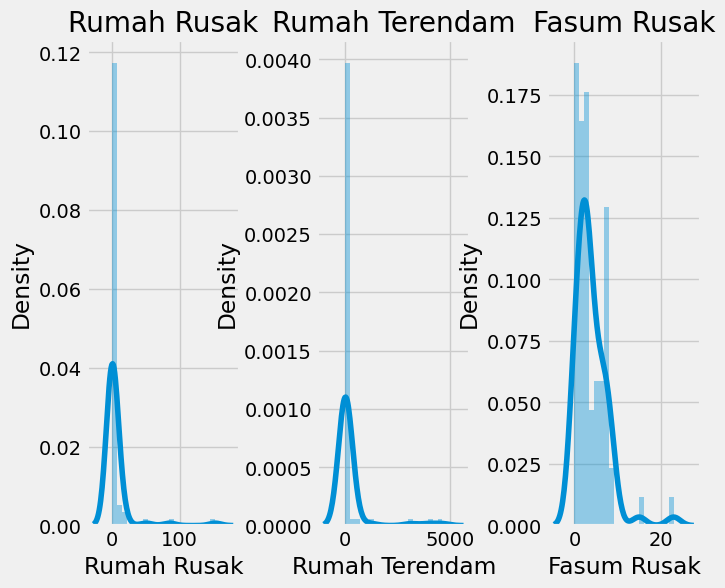

In [11]:
# amati masing" fitur
plt.figure(1, figsize = (15, 6))
n = 0

# lakukan perulangan untuk tiap kolom data
for x in ['Rumah Rusak', 'Rumah Terendam', 'Fasum Rusak']:
  n += 1
  plt.subplot(1, 6, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('{}'.format(x))

plt.show()

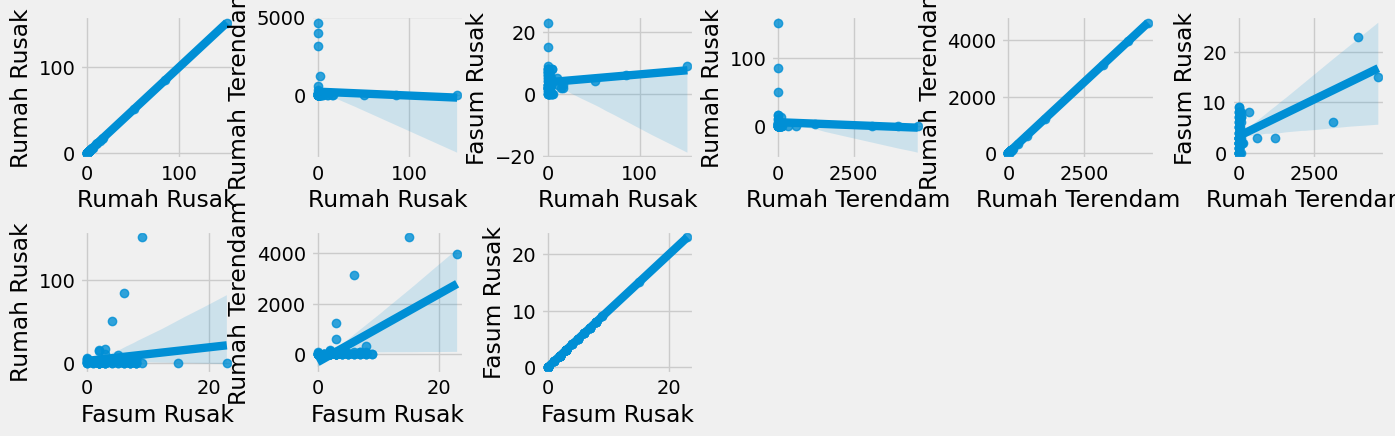

In [12]:
# ploting untuk mencari relasi antara rumah rusak, rumah terendam dan rumah terendam
plt.figure(1, figsize = (15, 15))
n = 0

for x in ['Rumah Rusak', 'Rumah Terendam', 'Fasum Rusak']:
  for y in ['Rumah Rusak', 'Rumah Terendam', 'Fasum Rusak']:
    n += 1
    plt.subplot(6, 6, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = x, y = y, data = df)
    plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

In [13]:
# rancang k-means untuk rumah rusak dan fasilitas umum rusak
# kemans, menentukan jumlah kluster dengn elbow
X1 = df[['Rumah Terendam', 'Fasum Rusak']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter=300, random_state=111))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

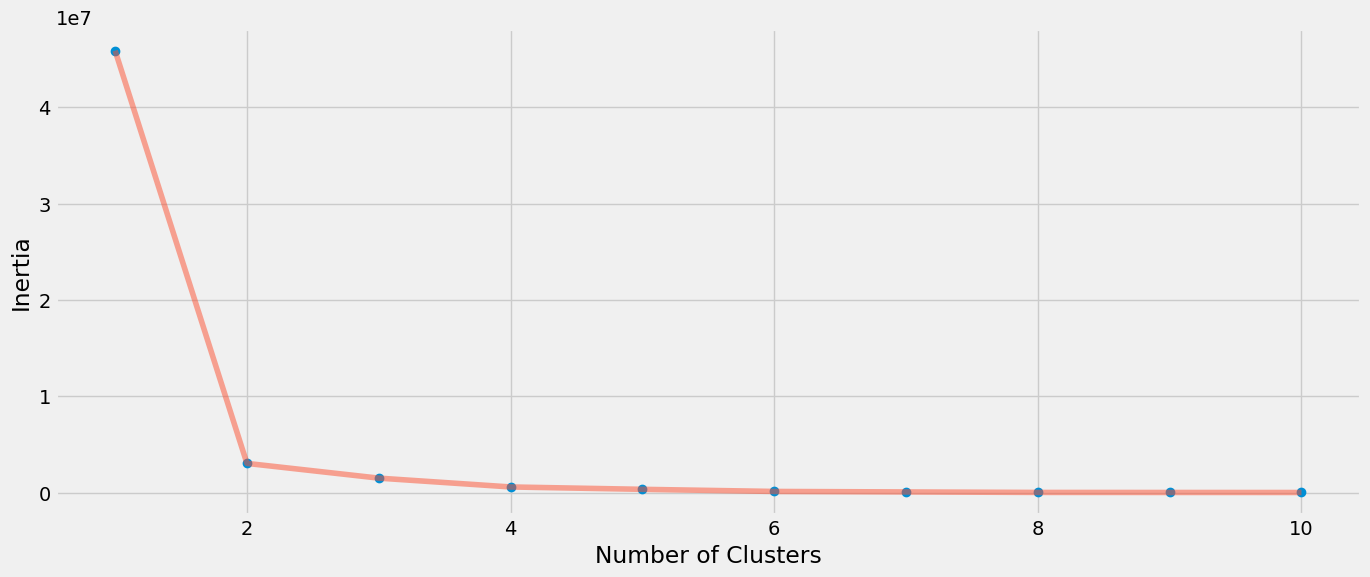

In [14]:
# plot elbow
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# bangung k-means
algorithm = (KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 111,        algorithm = 'elkan'))
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [16]:
# siapkan data untuk plot dan imshow
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
step = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
Z1 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) # array diratakan 1D

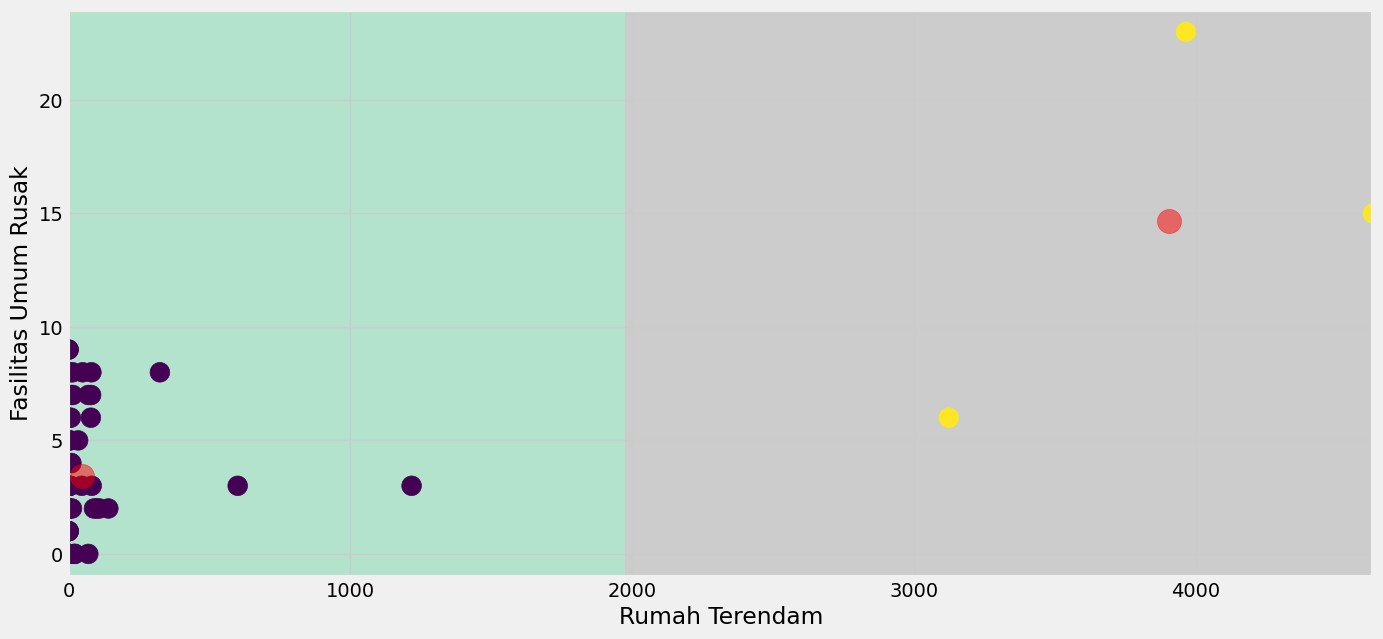

In [17]:
plt.figure(1, figsize = (15, 7))
plt.clf()
Z1 = Z1.reshape(xx.shape)
plt.imshow(Z1, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Rumah Terendam', y = 'Fasum Rusak',
            data = df, c =labels2, s = 200)
plt.scatter(x = centroids2[:, 0], y=centroids2[:, 1], s =300, c='red', alpha=0.5)
plt.ylabel('Fasilitas Umum Rusak')
plt.xlabel('Rumah Terendam')
plt.show()

In [18]:
# coba prediksi
data = [[2500, 10]]
print(data)
print(algorithm.predict(data))

[[2500, 10]]
[1]


In [19]:
app = Flask(__name__)

@app.route('/', methods=['GET'])
def index():
   return "<h1>Hello this is Data Science</h1>"

@app.route('/predict', methods=['GET', 'POST'])
def upload():
  data={"success":False}
  if request.method == 'POST':
    rumah = request.form['rumah']
    fasum = request.form['fasum']
    data = [[rumah, fasum]]

    try:
      prediksi = algorithm.predict(data)
      prediksi_list = prediksi.tolist()
      print(prediksi_list)
      return jsonify(prediksi_list)
    except Exception as e:
        return jsonify({"error": str(e)})
  else:
     return "<h1>Post data untuk menggunakan model</h1>"

In [22]:
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/Jan/2024 20:31:42] "POST /predict HTTP/1.1" 200 -


[0]


127.0.0.1 - - [15/Jan/2024 20:32:00] "POST /predict HTTP/1.1" 200 -


[0]


127.0.0.1 - - [15/Jan/2024 20:32:26] "POST /predict HTTP/1.1" 200 -


[0]


127.0.0.1 - - [15/Jan/2024 20:34:12] "POST /predict HTTP/1.1" 200 -


[0]


127.0.0.1 - - [15/Jan/2024 20:34:29] "POST /predict HTTP/1.1" 200 -


[0]


127.0.0.1 - - [15/Jan/2024 20:35:24] "POST /predict HTTP/1.1" 200 -


[0]
